replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/15 [00:00<?, ?it/s]

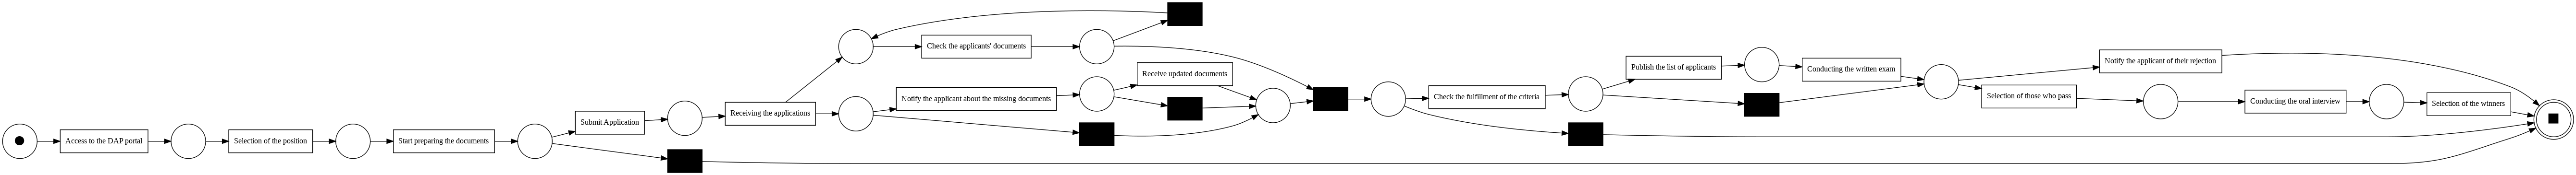

RESULTS
Dataset: procese.csv
Number of cases: 8
Number of events: 75
Number of unique activities: 15
Fitness Score: 1.0000
Precision Score: 0.7845


In [7]:

!pip install pm4py pandas --quiet

import pandas as pd
import pm4py


csv_filename = "procese.csv"
df = pd.read_csv(csv_filename)


case_id_column = 'CaseID'
activity_column = 'Activity'
timestamp_column = 'Timestamp'


df_prepared = df.rename(columns={
    case_id_column: 'case:concept:name',
    activity_column: 'concept:name',
    timestamp_column: 'time:timestamp'
})

df_prepared['case:concept:name'] = df_prepared['case:concept:name'].astype(str)
df_prepared['concept:name'] = df_prepared['concept:name'].astype(str)
df_prepared['time:timestamp'] = pd.to_datetime(df_prepared['time:timestamp'])

df_prepared = df_prepared.sort_values(['case:concept:name', 'time:timestamp'])

log = pm4py.convert_to_event_log(df_prepared)
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)

fitness = pm4py.fitness_token_based_replay(log, net, initial_marking, final_marking)
precision = pm4py.precision_token_based_replay(log, net, initial_marking, final_marking)

pm4py.view_petri_net(net, initial_marking, final_marking, format="png")


print("="*40)
print("RESULTS")
print("="*40)
print(f"Dataset: {csv_filename}")
print(f"Number of cases: {df_prepared['case:concept:name'].nunique()}")
print(f"Number of events: {len(df_prepared)}")
print(f"Number of unique activities: {df_prepared['concept:name'].nunique()}")
print(f"Fitness Score: {fitness['log_fitness']:.4f}")
print(f"Precision Score: {precision:.4f}")
print("="*40)